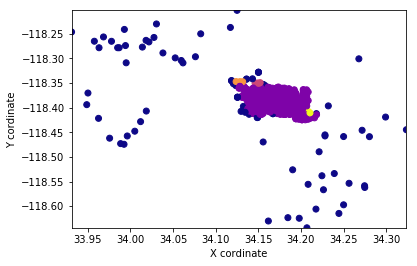

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

#Booleans, switch them on quickly to turn on print statements throughout.
debug = False
#debug = True

df = pd.read_csv('CleanedData.csv', index_col=0)

# rebuildLists takes in a master list, usually two values conjoined together,
# and spits out two lists that are split. Honestly only used to make the X and Y lists
# for the plotting parts of the matplotlib functions
# input: List similar to [[X,Y],[X,Y],[X,Y],[X,Y]]
# output: lists similar to [X.X.X.X] & [Y,Y,Y,Y]
def rebuildLists(zMaster):
	if(debug):
		print("Rebuilding now!\n")
	zChildOne, zChildTwo = [], []
	for i in range(len(zMaster)):
		zChildOne.append(zMaster[i][0])
		zChildTwo.append(zMaster[i][1])
	return zChildOne, zChildTwo

# parseCoord takes in a string object, meant to resemble a
# (XX.XXXX, YY.YYYY) format, and returns them both as float
# values. This is because the dataframe's "Location " column '
# is in a string fromat, cause, y'know... why make it easy?
def parseCoord(Str):
	tempStr = ""
	for X in range(len(Str)):
		if Str[X] == "(":
			continue
		elif Str[X] == ",":
			strOne = tempStr #Finished first number
			tempStr = ""
		elif Str[X] == " ":
			continue
		elif Str[X] == ")":
			strTwo = tempStr #Finished second number
		else:
			tempStr = tempStr + Str[X] #Add the actual unit to the string
	return float(strOne), float(strTwo)
	
# This is the function that should handle building the graphs themelves.
# The first bit, up until the end of the lastt elif statement is getting a range 
# of values for the graph's sake, like the x axis and y axis. It also populates '
# the lists containing the xCordinates and y cordinates.
# FYI xList, yList
def buildGraph(start, stop):
				#XMIN    XMAX   YMIN    YMAX
	ranges = [20000, -20000, 20000, -20000]
	xyList = []
	for X in range(start, stop):
		xCord, yCord = parseCoord(df["Location "][X])
		xyList.append([xCord, yCord])
		#checking to see new maxes and mins
		if xCord < ranges[0]:
			ranges[0] = xCord
		elif xCord > ranges[1]:
			ranges[1] = xCord
		if yCord < ranges[2]:
			ranges[2] = yCord
		elif yCord > ranges[3]:
			ranges[3] = yCord
	if(debug):
		print(ranges)
	
	#Calling to make the X & Y lists for the plotting functions
	xList, yList = rebuildLists(xyList)
	
	#Where your algorithm will most likely be called, yall can ignore my garbage here
	scaler = StandardScaler()
	X_scaled = scaler.fit_transform(xyList)
	dbscan = DBSCAN(eps=0.123, min_samples = 5)
	clusters = dbscan.fit_predict(X_scaled)
	# plot the cluster assignments
	plt.scatter(xList, yList, c=clusters, cmap="plasma")
	plt.xlabel("X cordinate")
	plt.ylabel("Y cordinate")
	plt.axis([ranges[0], ranges[1], ranges[2], ranges[3]])
	return ranges

#Running the functions down here
buildGraph(0,1000)

plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler

#Booleans, switch them on quickly to turn on print statements throughout.
debug = False
#debug = True
MIN_DISTANCE = 0.000001

df = pd.read_csv('CleanedData.csv', index_col=0)

# rebuildLists takes in a master list, usually two values conjoined together,
# and spits out two lists that are split. Honestly only used to make the X and Y lists
# for the plotting parts of the matplotlib functions
# input: List similar to [[X,Y],[X,Y],[X,Y],[X,Y]]
# output: lists similar to [X.X.X.X] & [Y,Y,Y,Y]
def rebuildLists(zMaster):
	if(debug):
		print("Rebuilding now!\n")
	zChildOne, zChildTwo = [], []
	for i in range(len(zMaster)):
		zChildOne.append(zMaster[i][0])
		zChildTwo.append(zMaster[i][1])
	return zChildOne, zChildTwo

# parseCoord takes in a string object, meant to resemble a
# (XX.XXXX, YY.YYYY) format, and returns them both as float
# values. This is because the dataframe's "Location " column '
# is in a string fromat, cause, y'know... why make it easy?
def parseCoord(Str):
	tempStr = ""
	for X in range(len(Str)):
		if Str[X] == "(":
			continue
		elif Str[X] == ",":
			strOne = tempStr #Finished first number
			tempStr = ""
		elif Str[X] == " ":
			continue
		elif Str[X] == ")":
			strTwo = tempStr #Finished second number
		else:
			tempStr = tempStr + Str[X] #Add the actual unit to the string
	return float(strOne), float(strTwo)
	 
    
# This is the function that should handle building the graphs themelves.
# The first bit, up until the end of the lastt elif statement is getting a range 
# of values for the graph's sake, like the x axis and y axis. It also populates '
# the lists containing the xCordinates and y cordinates.
# FYI xList, yList
def buildGraph(start, stop):
				#XMIN    XMAX   YMIN    YMAX
	ranges = [20000, -20000, 20000, -20000]
	xyList = []
	for X in range(start, stop):
		xCord, yCord = parseCoord(df["Location "][X])
		xyList.append([xCord, yCord])
		#checking to see new maxes and mins
		if xCord < ranges[0]:
			ranges[0] = xCord
		elif xCord > ranges[1]:
			ranges[1] = xCord
		if yCord < ranges[2]:
			ranges[2] = yCord
		elif yCord > ranges[3]:
			ranges[3] = yCord
	if(debug):
		print(ranges)
	
	#Calling to make the X & Y lists for the plotting functions
	xList, yList = rebuildLists(xyList)
	
	#Where your algorithm will most likely be called, yall can ignore my garbage here
	scaler = StandardScaler()
	X_scaled = scaler.fit_transform(xyList)
	meanShift = MeanShift(bandwidth=2)
	clusters = meanShift.fit_predict(X_scaled)
	# plot the cluster assignments
	plt.scatter(xList, yList, c=clusters, cmap="plasma")
	plt.xlabel("X cordinate")
	plt.ylabel("Y cordinate")
	plt.axis([ranges[0], ranges[1], ranges[2], ranges[3]])
	return ranges

    

#Running the functions down here
buildGraph(0,1000)

plt.show()

<Figure size 640x480 with 1 Axes>

In [14]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler

#Booleans, switch them on quickly to turn on print statements throughout.
debug = False
#debug = True

MIN_DISTANCE = 0.000001
TOLERANCE = 0.1

df = pd.read_csv('CleanedData.csv', index_col=0)

#Had to make these functions into a separate class argument
#so I could use it as a separate object to return
class PointGrouper(object):
#Calculates distance from a point to a group
	def distanceToGroup(point, group):
		minDist = sys.float_info.max
		for point2 in group:
			dist = euclidean_distance(point[0], point2[0], point[1], point2[1])
			if dist < minDist:
				minDist = dist
		return minDist

#Determines the nearest group to a point, using a set Tolerance level
	def determineNearestGroup(point, groups):
		indexForNearestGroup = None
		index = 0
		for group in groups:
			distToGroup = distanceToGroup(point, group)
			if distToGroup < TOLERANCE:
				indexForNearestGroup = index
			index += 1
		return indexForNearestGroup

#Creates groups based on location of where the points are
	def group(points):
		groupAssign = []
		group = []
		groupIndex = 0
		
		for point in points:
			indexForNearestGroup = self.determineNearestGroup(point, groups)
			if indexForNearestGroup is None:
				groups.append([point])
				groupAssign.append(groupIndex)
				groupIndex += 1
			else:
				groupAssign.append(indexForNearestGroup)
				groups[indexForNearestGroup].append(point)
		return np.array(groupAssign)
    
class MeanShiftResults:
	def initialize(self, orgPoints, shiftedPoints, idsOfClusters):
		self.orgPoints = orgPoints
		self.shiftedPoints = shiftedPoints
		self.idsOfClusters = idsOfClusters

# rebuildLists takes in a master list, usually two values conjoined together,
# and spits out two lists that are split. Honestly only used to make the X and Y lists
# for the plotting parts of the matplotlib functions
# input: List similar to [[X,Y],[X,Y],[X,Y],[X,Y]]
# output: lists similar to [X.X.X.X] & [Y,Y,Y,Y]
def rebuildLists(zMaster):
	if(debug):
		print("Rebuilding now!\n")
	zChildOne, zChildTwo = [], []
	for i in range(len(zMaster)):
		zChildOne.append(zMaster[i][0])
		zChildTwo.append(zMaster[i][1])
	return zChildOne, zChildTwo

# parseCoord takes in a string object, meant to resemble a
# (XX.XXXX, YY.YYYY) format, and returns them both as float
# values. This is because the dataframe's "Location " column '
# is in a string fromat, cause, y'know... why make it easy?
def parseCoord(Str):
	tempStr = ""
	for X in range(len(Str)):
		if Str[X] == "(":
			continue
		elif Str[X] == ",":
			strOne = tempStr #Finished first number
			tempStr = ""
		elif Str[X] == " ":
			continue
		elif Str[X] == ")":
			strTwo = tempStr #Finished second number
		else:
			tempStr = tempStr + Str[X] #Add the actual unit to the string
	return float(strOne), float(strTwo)

#Simple distance calculation
def euclidean_distance(x1, x2, y1, y2):
	dist = math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
	return dist

#Gaussian kernel function for weighting the points
def kernel(dist, bandwidth=1):
	gaus = (1/(bandwidth*math.sqrt(2*math.pi))) * math.exp(-0.5*(dist/bandwidth))**2
	return gaus

#Shifting the points to a central point
def shift(p, points):
	sumWeight = float(0)
	for plot in points:
		dist = euclidean_distance(p[0], p[1], plot[0], plot[1])
		weight = kernel(dist)
		shiftX = float(plot[0]*weight)
		shiftY = float(plot[1]*weight)
		sumWeight += weight
	shiftX = float(shiftX) / sumWeight
	shiftY = float(shiftY) / sumWeight
	return [shiftX, shiftY]
    
def cluster(points):
	shiftingPoints = np.array(points)
	x = 0
	mmdist = 1
	
	stillShifting = [True] * points.shape[0]
	while mmdist > MIN_DISTANCE:
		mmdist = 0
		x += 1
		for i in range(0, len(shiftingPoints)):
			if not stillShifting[i]:
				continue
			pNew = shiftingPoints[i]
			pNewStart = pNew
			pNew = shift(pNew, points)
			dist = euclidean_distance(pNew[0], pNewStart[0], pNew[1], pNewStart[1])
			if dist > mmdist:
				mmdist = dist
			if dist < mmdist:
				stillShifting[i] = False
			shiftingPoints[i] = pNew
	pointGrouper = PointGrouper()
	groupAssign = PointGrouper.group(shiftingPoints.tolist())
	return MeanShiftResults(points, shiftingPoints, groupAssign)
    
# This is the function that should handle building the graphs themelves.
# The first bit, up until the end of the lastt elif statement is getting a range 
# of values for the graph's sake, like the x axis and y axis. It also populates '
# the lists containing the xCordinates and y cordinates.
# FYI xList, yList
def buildGraph(start, stop):
				#XMIN    XMAX   YMIN    YMAX
	ranges = [20000, -20000, 20000, -20000]
	xyList = []
	for X in range(start, stop):
		xCord, yCord = parseCoord(df["Location "][X])
		xyList.append([xCord, yCord])
		#checking to see new maxes and mins
		if xCord < ranges[0]:
			ranges[0] = xCord
		elif xCord > ranges[1]:
			ranges[1] = xCord
		if yCord < ranges[2]:
			ranges[2] = yCord
		elif yCord > ranges[3]:
			ranges[3] = yCord
	if(debug):
		print(ranges)
	
	#Calling to make the X & Y lists for the plotting functions
	xList, yList = rebuildLists(xyList)
	
	
	
	
	
	#Where your algorithm will most likely be called, yall can ignore my garbage here
	scaler = StandardScaler()
	X_scaled = scaler.fit_transform(xyList)
	
	data = np.array(xyList)
	
	meanShiftResults = cluster(data)
	
	
	
	# plot the cluster assignments
	plt.scatter(xList, yList, cmap="plasma")
	plt.xlabel("X cordinate")
	plt.ylabel("Y cordinate")
	plt.axis([ranges[0], ranges[1], ranges[2], ranges[3]])
	return ranges



#Running the functions down here
buildGraph(0,1000)

plt.show()

NameError: name 'self' is not defined